In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.insert(0, '../../../')
from copy import deepcopy
import datetime
from helpers.ipython_helpers import (
    print_full
)
from helpers.rating_model_helpers import (
    RatingModelTrainer
)
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
original_features_df = pd.read_csv("../../../../data/credit_rating/intermediate_data/annual_credit_rating_features.csv")

In [3]:
rf_model = RandomForestClassifier()

In [4]:
trainer = RatingModelTrainer(original_features_df)
trainer.make_dev_and_test_df(threshold_year=2005)
trainer.train_model(rf_model)

F1 Score - micro
0.145999064109
F1 Score - macro
0.0944692945042
F1 Score - weighted
0.14638752028
Precision Score - micro
0.145999064109
Precision Score - macro
0.108821628325
Precision Score - weighted
0.170659208995
Recall Score - micro
0.145999064109
Recall Score - macro
0.112596141104
Recall Score - weighted
0.145999064109
Detailed classification report:
             precision    recall  f1-score   support

        1.0       0.07      0.34      0.11        50
        2.0       0.00      0.00      0.00        15
        3.0       0.05      0.16      0.07       108
        4.0       0.06      0.12      0.08       167
        5.0       0.07      0.16      0.10       288
        6.0       0.10      0.24      0.14       552
        7.0       0.10      0.13      0.11       610
        8.0       0.14      0.14      0.14       950
        9.0       0.18      0.17      0.18      1349
       10.0       0.13      0.10      0.11      1029
       11.0       0.11      0.07      0.08       766
 

/Users/wentaoxu/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/wentaoxu/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/wentaoxu/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix, without normalization


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
1,17,3,16,2,3,4,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,4,2,5,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,19,4,17,16,10,22,8,3,3,4,0,1,1,0,0,0,0,0,0,0,0,0
4,34,1,34,20,23,25,18,4,2,3,0,1,1,1,0,0,0,0,0,0,0,0
5,58,16,38,27,47,37,21,16,17,4,4,0,1,1,1,0,0,0,0,0,0,0
6,37,12,55,53,117,130,38,51,28,16,1,8,4,2,0,0,0,0,0,0,0,0
7,21,17,50,46,67,143,82,68,80,17,5,4,8,0,2,0,0,0,0,0,0,0
8,29,13,54,42,120,223,130,134,107,54,17,11,8,7,0,0,0,1,0,0,0,0
9,21,9,45,51,131,273,181,184,232,106,46,34,29,5,2,0,0,0,0,0,0,0
10,9,4,21,33,68,185,119,141,192,103,38,59,35,19,1,2,0,0,0,0,0,0


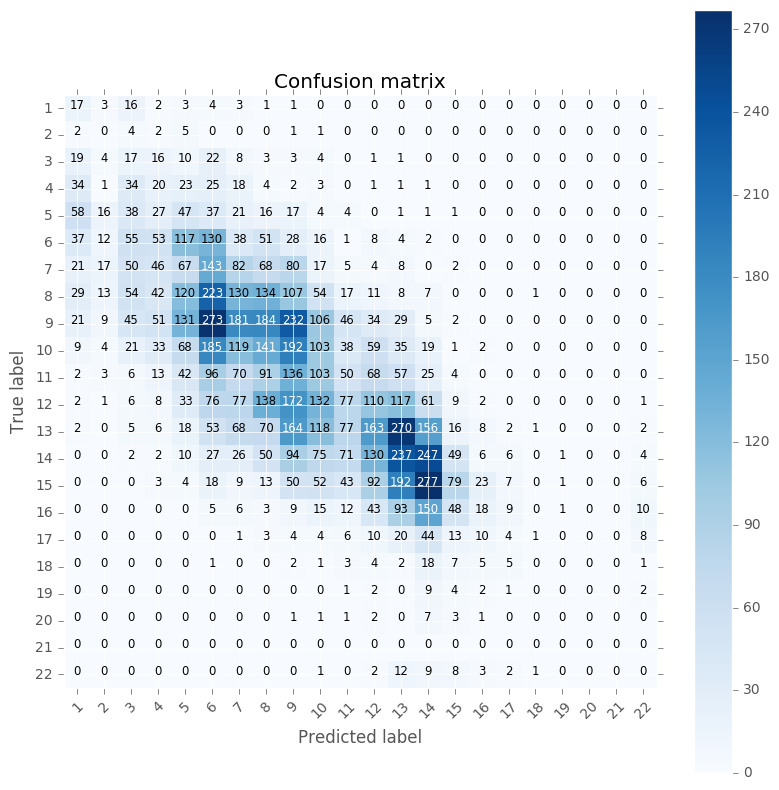

In [5]:
trainer.display_results()

In [6]:
rf_model_balanced = RandomForestClassifier(class_weight='balanced')

In [8]:
trainer_balanced = RatingModelTrainer(original_features_df)
trainer_balanced.make_dev_and_test_df(threshold_year=2005)
trainer_balanced.train_model(rf_model_balanced)

F1 Score - micro
0.14347215723
F1 Score - macro
0.102518803996
F1 Score - weighted
0.144369393235
Precision Score - micro
0.14347215723
Precision Score - macro
0.116966042198
Precision Score - weighted
0.169157929715
Recall Score - micro
0.14347215723
Recall Score - macro
0.129514885909
Recall Score - weighted
0.14347215723
Detailed classification report:
             precision    recall  f1-score   support

        1.0       0.08      0.44      0.14        50
        2.0       0.02      0.13      0.04        15
        3.0       0.05      0.19      0.08       108
        4.0       0.05      0.11      0.07       167
        5.0       0.07      0.16      0.10       288
        6.0       0.09      0.23      0.13       552
        7.0       0.09      0.13      0.11       610
        8.0       0.13      0.13      0.13       950
        9.0       0.19      0.18      0.18      1349
       10.0       0.14      0.10      0.12      1029
       11.0       0.13      0.07      0.09       766
     

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
1,22,4,3,3,12,2,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2,1,4,4,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,15,6,21,16,14,19,7,3,2,3,1,1,0,0,0,0,0,0,0,0,0,0
4,43,2,28,19,20,20,14,5,7,5,0,2,1,1,0,0,0,0,0,0,0,0
5,46,13,48,24,47,44,19,16,14,7,3,4,1,2,0,0,0,0,0,0,0,0
6,40,10,62,54,110,125,55,41,25,14,5,7,2,2,0,0,0,0,0,0,0,0
7,28,9,56,39,77,160,79,62,58,24,2,7,5,3,1,0,0,0,0,0,0,0
8,41,13,63,57,115,208,110,128,134,39,13,11,15,2,0,1,0,0,0,0,0,0
9,15,16,62,64,127,281,173,177,238,89,36,32,23,12,0,2,1,0,0,0,0,1
10,8,9,31,33,75,188,126,147,176,105,35,36,38,20,1,1,0,0,0,0,0,0


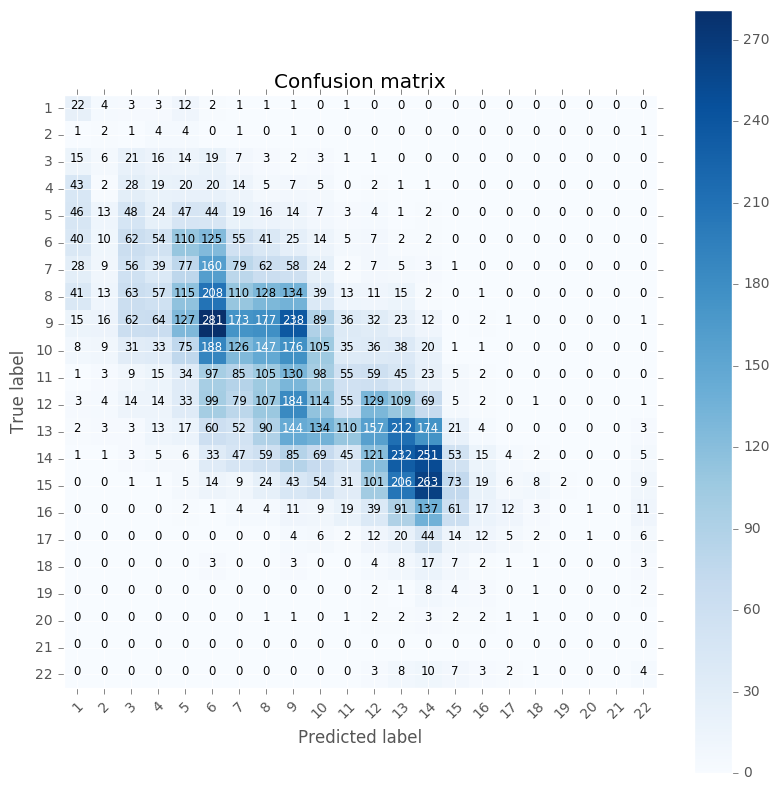

In [9]:
trainer_balanced.display_results()